In [111]:
import numpy as np

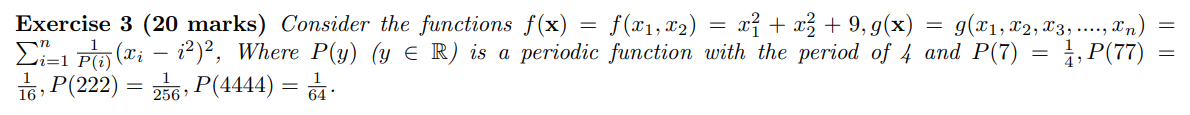

In [112]:
def f(x1,x2):
    return x1*x1 + x2*x2 + 9

In [113]:
def df_dx1(x1,x2):
    return 2*x1

In [114]:
def df_dx2(x1,x2):
    return 2*x2

In [115]:
def P_inv(i):
    rem = i%4
    if rem == 0:
        P_inv = 64
    elif rem == 1:
        P_inv = 16
    elif rem == 2:
        P_inv = 256
    else:
        P_inv = 4
    return P_inv

In [116]:
def g(x):
    sum = 0
    for i in range(len(x)):
        rem = (i+1)%4
        sum += (x[i] - (i+1)*(i+1))*(x[i] - (i+1)*(i+1))*P_inv(rem)
    return sum

In [117]:
def dg_dx(x):
    return np.array([2*P_inv(i+1)*(x[i]-(i+1)*(i+1)) for i in range(len(x))])

In [118]:
def L2Norm_g(x):
    return np.dot(dg_dx(x),dg_dx(x))

In [119]:
def Hessian_g(x):
    ans = np.zeros((len(x),len(x)))
    for i in range(len(x)):
        ans[i,i] = 2*P_inv(i+1)
    return ans

In [120]:
def Hessian_inv_g(x):
    ans = np.zeros((len(x),len(x)))
    for i in range(len(x)):
        ans[i,i] = 1/(2*P_inv(i+1))
    return ans

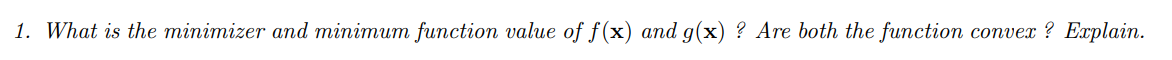

*F()*  
Minimizer: (0,0)  
Minimum function value: 0  
Hessian Matrix: Identity matrix*2  
Hessian matrix is positive semi definite as all eigen values are positive(ie. diagonal elements = 2) 

*G()*  
Minimizer: (i*i for i in range(1 to n)), because P(i) is always positive for integers  
Minimum function value: 0  
Hessian Matrix: Diagonal matrix with diagonal element of ith row = 2/P(i)  
Hessian matrix is positive semi definite as all eigen values are positive(ie. diagonal elements are 2/P(i))  

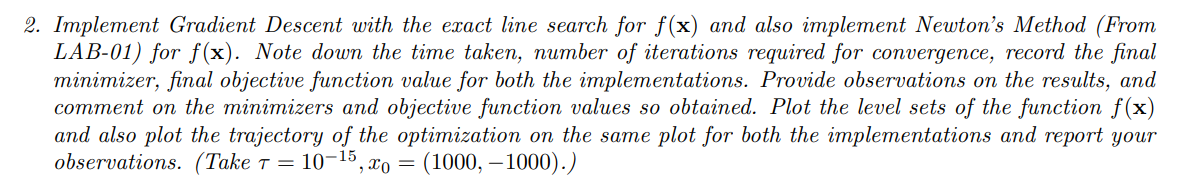

##### Newtons method for f(x)

In [121]:
import numpy as np

In [122]:
def inv(matrix):
    return np.linalg.inv(matrix)

In [123]:
def Hessian_f(x1,x2):
    arr = np.zeros((2,2))
    arr[0,0] = 2.0
    arr[0,1] = 0
    arr[1,0] = 0
    arr[1,1] = 2
    return arr

In [124]:

# Defining the norm function
def L2Norm(x,y):
    grad_x1 = df_dx1(x,y)
    grad_x2 = df_dx2(x,y)
    return np.sqrt(grad_x1** 2 + grad_x2** 2)

In [125]:
def Newton_Raphson(x1_start,x2_start,p_values):

    
    iter_list = []
    minimizer_list = []
    function_value_list = []
      
    for i in range(len(p_values)):

        x1 = x1_start
        x2 = x2_start
        x_array = np.array([[x1],[x2]])
        tolerance = pow(0.1,p_values[i])

        iter = 0
        while(L2Norm(x_array[0],x_array[1]) > tolerance):
            iter = iter + 1
            df_dx1_temp = df_dx1(x_array[0],x_array[1])
            df_dx2_temp = df_dx2(x_array[0],x_array[1])
            df_dx_matrix = np.array([[df_dx1_temp],[df_dx2_temp]])
            # Hessian_matrix = Hessian(x1,x2)
            # Hessian_inv  = inv(Hessian_matrix)
            x_array = x_array - np.dot(inv(Hessian_f(x_array[0],x_array[1])),df_dx_matrix.reshape(2,1))
            # print("term",  np.dot(inv(Hessian(x1,x2)),df_dx_matrix.reshape(2,1)))
            # print("xarray", x_array)
            # print("Norm", L2Norm())
            # iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append(x_array)
        function_value_list.append(f(x_array[0],x_array[1]))

    return p_values,iter_list,minimizer_list,function_value_list


In [126]:
x1_start = 1000
x2_start = -1000
p_values = [pow(0.1, 15)]
p_vals,iter_lst,minimizer_lst,function_value_lst = Newton_Raphson(x1_start,x2_start,p_values)

In [127]:
from tabulate import tabulate

#### Results of Newton Raphson on f()

In [128]:
table1 = zip(p_vals,iter_lst,minimizer_lst,function_value_lst)
headers_t1 = ["P values","No of iterations","Minimizer","Function value"]
print(tabulate(table1,headers=headers_t1,tablefmt="grid"))

+------------+--------------------+-------------+------------------+
|   P values |   No of iterations | Minimizer   |   Function value |
+============+====================+=============+==================+
|      1e-15 |                  1 | [[0.]       |                9 |
|            |                    |  [0.]]      |                  |
+------------+--------------------+-------------+------------------+


#### Gradient descent with exact line search

Let p = - [df_dx1, df_dx2]  
x_k+1 = x_k + step_length*p  
Solving for step_length to minimize f(x_k+1) with step_length >= 0

In [129]:
def gradient_descent(start_X1, start_x2,p_values):

    iter_list = []
    minimizer_list = []
    function_value_list = []

    for i in range(len(p_values)):

        x1 = start_X1
        x2 = start_x2
        tolerance_lvl = pow(10,-p_values[i])        

        iter = 0
        while(L2Norm(x1,x2) > tolerance_lvl):
            df_dx1_temp = df_dx1(x1,x2)
            df_dx2_temp = df_dx2(x1,x2)
            p1 = -df_dx1_temp
            p2 = -df_dx2_temp

            alpha = -(p1*x1+p2*x2)/(p1*p1+p2*p2)
            if alpha >= 0:
                step_length = alpha
            else:
                step_length = 0

            x1 = x1 - step_length*df_dx1_temp
            x2 = x2 - step_length*df_dx2_temp
            iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append([x1,x2])
        function_value_list.append(f(x1,x2))

    return p_values,iter_list,minimizer_list,function_value_list

In [130]:
x1_start = 1000
x2_start = -1000
step_length = 0.001
p_values = [pow(0.1,15)]
p_vals,iter_lst,minimizer_lst,function_value_lst = gradient_descent(x1_start,x2_start,p_values)

In [131]:
table2 = zip(p_vals,iter_lst,minimizer_lst,function_value_lst)
headers_t2 = ["P values","Iterations","minimizer","function_value"]
print(tabulate(table2,headers=headers_t2,tablefmt="grid"))

+------------+--------------+-------------+------------------+
|   P values |   Iterations | minimizer   |   function_value |
+============+==============+=============+==================+
|      1e-15 |            1 | [0.0, 0.0]  |                9 |
+------------+--------------+-------------+------------------+


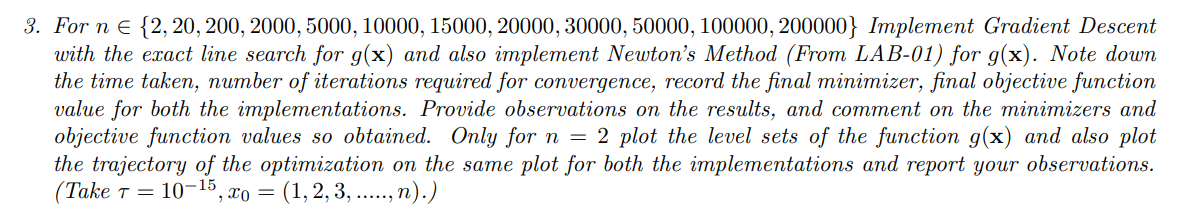

In [132]:
def Newton_g(n_values,tolerance):

    
    iter_list = []
    minimizer_list = []
    function_value_list = []
      
    for n in range(len(n_values)):

        x = [j+1 for j in range(n_values[n])]
        x = np.array(x)

        iter = 0
        while(L2Norm_g(x> tolerance)):
            iter = iter + 1
            x = x - np.dot(Hessian_inv_g(x),dg_dx(x))
            print("x value:",x)
            print("Hessian diff:",np.dot(inv(Hessian_inv_g(x)),dg_dx(x)))
            print("Hessian_inversew:",Hessian_inv_g(x))
            print("DG_DX: ",dg_dx(x))

        iter_list.append(iter)
        minimizer_list.append(x)
        function_value_list.append(g(x))

    return iter_list,minimizer_list,function_value_list


In [133]:
# n_values = [2,20,200,2000,5000,10000,15000,20000,30000,50000,100000,200000]
n_values = [20]

tolerance = pow(0.1,15)
iter_list,minimizer_list,function_value_list = Newton_g(n_values,tolerance)

x value: [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100. 121. 144. 169. 196.
 225. 256. 289. 324. 361. 400.]
Hessian diff: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hessian_inversew: [[0.03125    0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.00195312 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.125      0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0078125  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.

Hessian_inversew: [[0.03125    0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.00195312 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.125      0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.0078125  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.03125    0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.     

KeyboardInterrupt: 